<h1 align='center'>ASSIGNMENT</h1>

***

__Objective:__ to create a __ML Model__ using the __adult census dataset__ to figure out if an adult has an __income greater than \\$50k Dollars__ annually.

***

## Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

***

## Importing the Dataset from the Website
Saving __column names__ picked up from the __official website__ since column name was __not included__ in the training and test datasets.

Both datasets have a different formating style with with seperators as ', '.

In [2]:
column_name = ['age',
               'workclass',
               'fnlwgt',
               'education',
               'education_num',
               'marital_status',
               'occupation',
               'relationship',
               'race',
               'sex',
               'capital_gain',
               'capital_loss',
               'hours_per_week',
               'native_country',
               'income']

adult_data_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                               names = column_name, sep = ', ', engine = 'python')

adult_data_test  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', 
                               names = column_name, sep = ', ', engine = 'python')

***

## Viewing the Data

In [3]:
adult_data_train.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_data_test.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


> - Removing the _first row_ from the test dataset since it was a _NULL_ row
- Also, in the __'income'__ column of the testing dataset, we see there is a __'.'__ after the every value entry which is not present in the training dataset which __needs to be removed__.

In [5]:
adult_data_test = adult_data_test.iloc[1:]
adult_data_test['income'] = adult_data_test['income'].map(lambda x: x.rstrip('.'))
adult_data_test.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


### Summary of the train and test datasets

In [6]:
adult_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
adult_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education_num   16281 non-null  float64
 5   marital_status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital_gain    16281 non-null  float64
 11  capital_loss    16281 non-null  float64
 12  hours_per_week  16281 non-null  float64
 13  native_country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


> In both the datasets there are __NO NULL DATA__ anywhere. However in Test dataset, the datatype of features 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss' and 'hours_per_week' should be __'int64'__.

In [8]:
column_changetype = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i in range(0,len(column_changetype),1):
    adult_data_test.loc[:,column_changetype[i]] = adult_data_test[column_changetype[i]].astype('int64')

adult_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


***

## Distinguish categorical and numerical features of the dataset

> The features that are __categorical__ are: 
- __workclass__
- __education__ 
- __marital_status__ 
- __occupation__
- __relationship__ 
- __race__
- __sex__
- __native_country__

In [9]:
categorical_feature = ['workclass', 
                       'education', 
                       'marital_status', 
                       'occupation', 
                       'relationship', 
                       'race', 
                       'sex', 
                       'native_country']

> The features that are __numerical__ are: 
- __age__
- __fnlwgt__
- __education_num__
- __capital_gain__
- __capital_loss__
- __hours_per_week__

In [10]:
numerical_feature = ['age', 
                     'fnlwgt', 
                     'education_num', 
                     'capital_gain', 
                     'capital_loss', 
                     'hours_per_week']

***

## Checking for any Irregular entry within the Categorical Features

To check for irregular entry, we check the different type of values within the categorical features

### For the Training Dataset

In [11]:
for i in range(0,len(categorical_feature),1):
    print(categorical_feature[i])
    print("\n")
    print(adult_data_train[categorical_feature[i]].value_counts()*100/adult_data_train.shape[0])
    print("\n")

workclass


Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
?                    5.638647
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: workclass, dtype: float64


education


HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64


marital_status


Married-civ-spouse       45.993673
Never-married            32.809189
Divorced                 13.645158
Separated                 3.147938
Widowed                   3.049661
Married-spouse-absent     1.28

### For the Testing Dataset

In [12]:
for i in range(0,len(categorical_feature),1):
    print(categorical_feature[i])
    print("\n")
    print(adult_data_test[categorical_feature[i]].value_counts()*100/adult_data_test.shape[0])
    print("\n")

workclass


Private             68.853265
Self-emp-not-inc     8.113752
Local-gov            6.406240
?                    5.914870
State-gov            4.195074
Self-emp-inc         3.556293
Federal-gov          2.899085
Without-pay          0.042995
Never-worked         0.018426
Name: workclass, dtype: float64


education


HS-grad         32.448867
Some-college    22.031816
Bachelors       16.399484
Masters          5.736748
Assoc-voc        4.170505
11th             3.912536
Assoc-acdm       3.279897
10th             2.800811
7th-8th          1.897918
Prof-school      1.584669
9th              1.486395
12th             1.375837
Doctorate        1.111725
5th-6th          1.081015
1st-4th          0.485228
Preschool        0.196548
Name: education, dtype: float64


marital_status


Married-civ-spouse       45.470180
Never-married            33.376328
Divorced                 13.451262
Widowed                   3.224618
Separated                 3.101775
Married-spouse-absent     1.28

We can see that in the feature 'workclass', 'occupation' and 'native_country' in BOTH the datasets have MISSING DATA as '?'.

> __For Training Dataset:__  'workclass' and 'occupation' has __5.6%__ and 'native_country' has __1.79%__ missing data.
                      
> __For Testing Dataset :__ 'workclass' and 'occupation' has __5.9%__ and 'native_country' has __1.68%__ missing data.

Since the values in __native_countries__ are __overwhelmingly__ from the __'United-States'__, we can __replace__ the __missing values in 'native_country' with 'United-States'__. 

In [13]:
adult_data_train['native_country'] = adult_data_train['native_country'].replace('?','United-States')
adult_data_test['native_country']  =  adult_data_test['native_country'].replace('?','United-States')

> We need to check where the missing data are in the occupation and workclass in the training and test dataset.

In [14]:
adult_data_train.loc[(adult_data_train['workclass'] == '?') 
                   | (adult_data_train['occupation'] == '?'),
                     ['workclass', 'occupation']]

,workclass,occupation
27,?,?
61,?,?
69,?,?
77,?,?
106,?,?
...,...,...
32530,?,?
32531,?,?
32539,?,?
32541,?,?


In [15]:
adult_data_test.loc[(adult_data_test['workclass'] == '?') 
                 | (adult_data_test['occupation'] == '?'),
                 ['workclass', 'occupation']]

,workclass,occupation
5,?,?
7,?,?
14,?,?
23,?,?
36,?,?
...,...,...
16122,?,?
16209,?,?
16240,?,?
16252,?,?


As we can see almost all the __missing data__ is missing from the __two columns in a single row__. Therefore, we have to __remove the rows with missing data__.

Saving all the index of the rows to be removed from the dataset from the training and test dataset.

In [16]:
train_data_drop = adult_data_train.loc[(adult_data_train['workclass'] == '?') 
                                    | (adult_data_train['occupation'] == '?')].index
test_data_drop  = adult_data_test.loc[(adult_data_test['workclass'] == '?') 
                                    | (adult_data_test['occupation'] == '?')].index

> __Removing__ the rows containing __missing values__.

In [17]:
adult_data_train = adult_data_train.drop(train_data_drop)
adult_data_test = adult_data_test.drop(test_data_drop)

***

## Checking for any Irregular entry within the Numerical Features

The data type for all Numerical Features is 'int64' which means we have all values as integers in the Numerical features and the only irregularity we have to check is if there are any outliers within the Numerical Features.

In [18]:
adult_data_train[numerical_feature].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30718.000000,3.071800e+04,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,1.898455e+05,10.130314,1106.037079,88.910216,40.949313
std,13.118227,1.054583e+05,2.562469,7497.863364,405.657203,11.985382
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
adult_data_test[numerical_feature].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,15315.000000,1.531500e+04,15315.000000,15315.000000,15315.000000,15315.000000
mean,38.783284,1.897240e+05,10.126151,1130.971466,88.366569,40.946588
std,13.372726,1.055111e+05,2.567341,7770.473836,404.646562,12.062818
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.169830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779510e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.388020e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


As we can see, for age, fnlwgt, education_num and hours_per_week look reasonable, however there are huge variations in  capital_gain and capital_loss with standard deviations of 7497.86 and 405.65 in training dataset and 7770.47 and 404.64 in the testing dataset respectively.

***

## Visualizing the Data

### Numerical Features

> The best way to __visualize__ just these __numerical features__ is with a __pair plot__.

<Figure size 7200x1800 with 0 Axes>

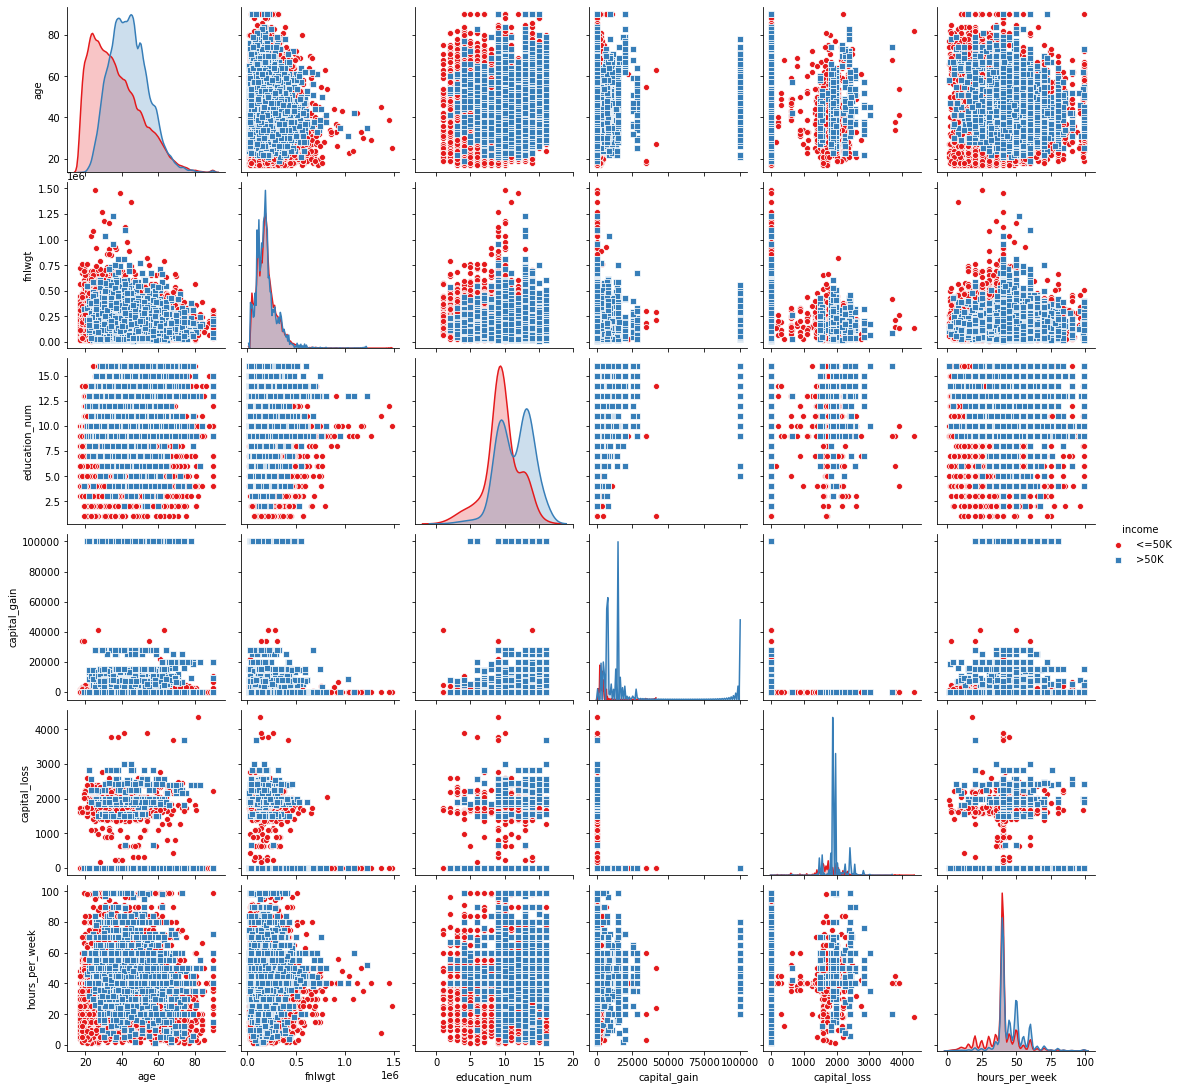

In [20]:
plt.figure(figsize=(100,25))
sb.pairplot(adult_data_train, hue='income', diag_kws={'bw':1.0}, palette = "Set1", markers=["o","s"])
plt.show()

## Oberservations

- If an adult has a very high capital gain, then the adult's income is >50K, however if the capital gain is somewhere between 30000 to 50000, then the adult has an income <=50K.
- If an adult has a capital loss equal to zero, then the adult is most likely to have an income >50K.
- Also if an adult has zero capital gain is more likely to have an income <=50K.
- Moreover, as age increases, the adult is more likely to have an income >50K.
- An adult with a higher education_num is more likely to have an income of > 50K.

Finally we have to __check__ if there is __any collinearity__ between the numerical features.

In [21]:
adult_data_test.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.074222,0.025819,0.078956,0.057577,0.102814
fnlwgt,-0.074222,1.000000,-0.033481,-0.012095,0.006986,-0.009390
education_num,0.025819,-0.033481,1.000000,0.130558,0.085763,0.133038
capital_gain,0.078956,-0.012095,0.130558,1.000000,-0.031787,0.089595
capital_loss,0.057577,0.006986,0.085763,-0.031787,1.000000,0.058710
hours_per_week,0.102814,-0.009390,0.133038,0.089595,0.058710,1.000000


As we can see there are no correlation coefficient values near +1 or -1 implying __no strong correlation between the numerical features__ and we should use all the numerical features to build the model.

### Categorical data

> We can check each of the __categorical features__ with respect to the __number count__ of individual categories with respect to the __income__.

##### Workclass

In [22]:
from matplotlib.colors import Colormap

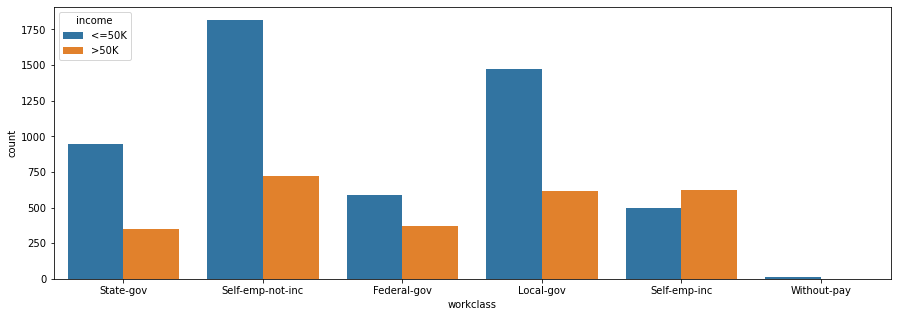

In [23]:
plt.figure(figsize=(15,5))
sb.countplot(data = adult_data_train[adult_data_train['workclass']!='Private'] ,hue = "income", x="workclass")
plt.show()

##### Education

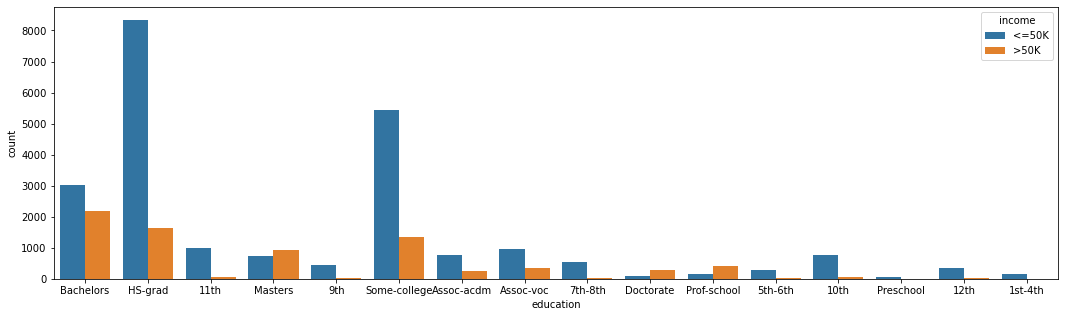

In [24]:
plt.figure(figsize=(18,5))
sb.countplot(data = adult_data_train ,hue = "income", x="education")
plt.show()

##### Marital_Status

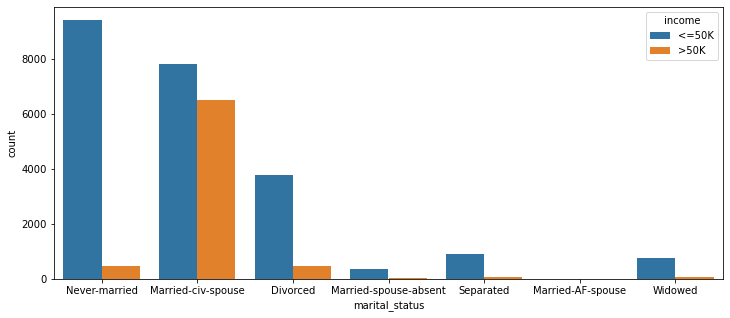

In [25]:
plt.figure(figsize=(12,5))
sb.countplot(data = adult_data_train ,hue = "income", x="marital_status")
plt.show()

##### Occupation

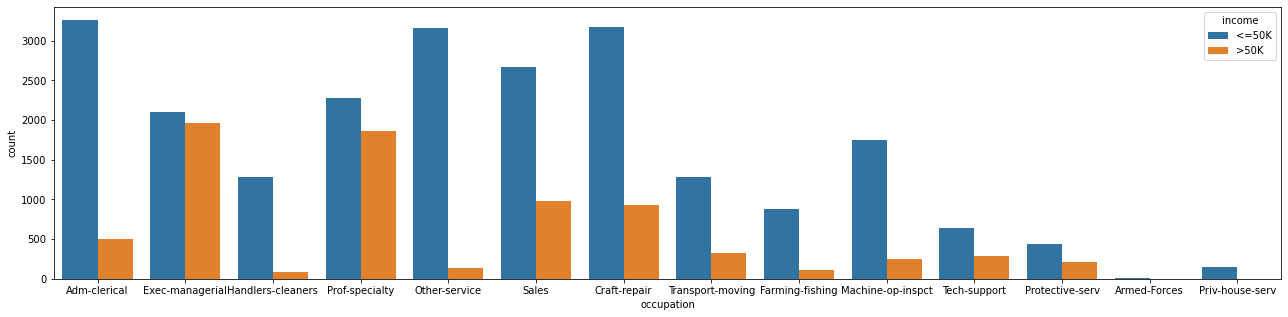

In [26]:
plt.figure(figsize=(22,5))
sb.countplot(data = adult_data_train ,hue = "income", x="occupation")
plt.show()

##### Relationship

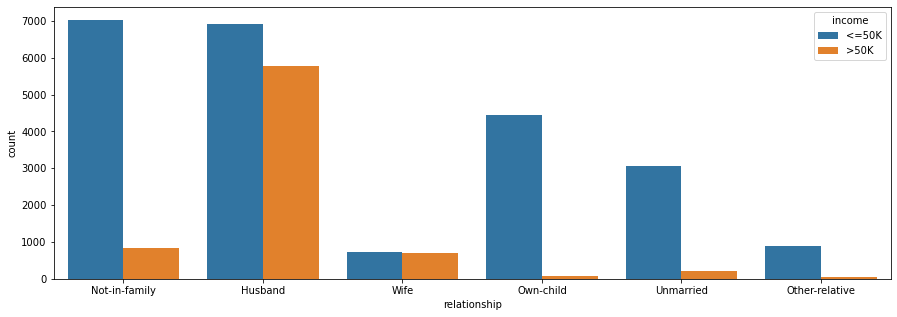

In [27]:
plt.figure(figsize=(15,5))
sb.countplot(data = adult_data_train ,hue = "income", x="relationship")
plt.show()

##### Race

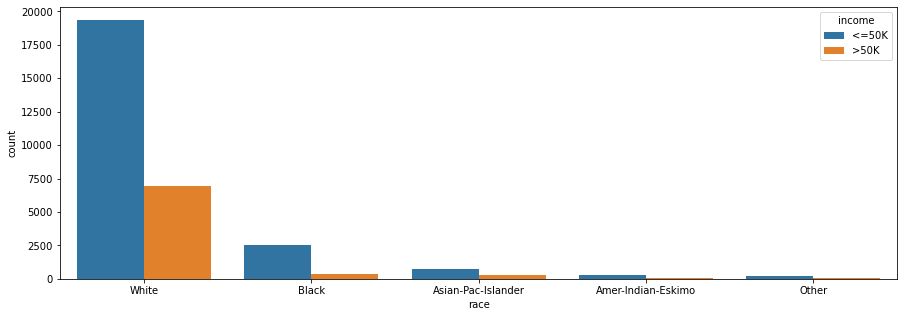

In [28]:
plt.figure(figsize=(15,5))
sb.countplot(data = adult_data_train ,hue = "income", x="race")
plt.show()

##### Sex

<function matplotlib.pyplot.show(*args, **kw)>

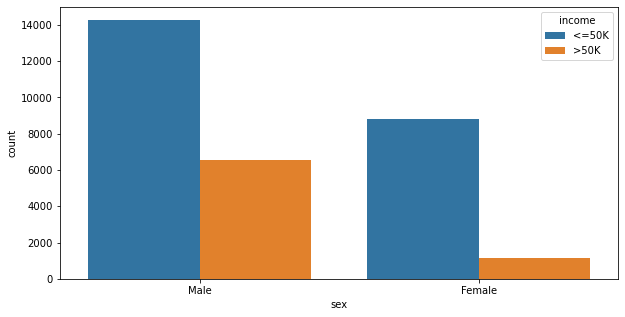

In [29]:
plt.figure(figsize=(10,5))
sb.countplot(data = adult_data_train ,hue = "income", x="sex")
plt.show

##### Native_Country

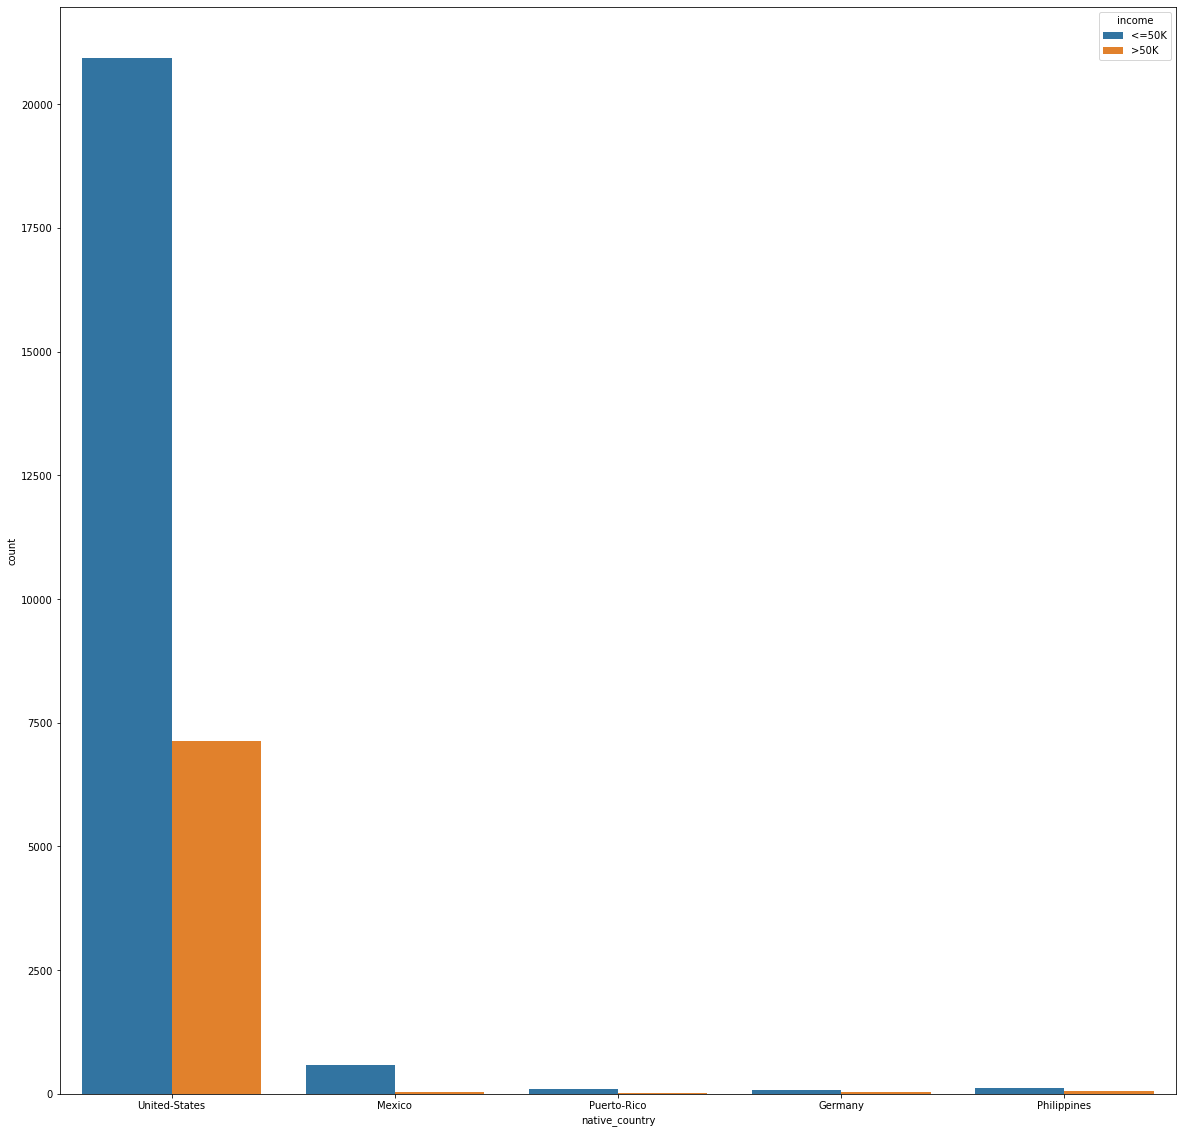

In [30]:
#only taking up the top 5 countires since there are 41 different countries
plt.figure(figsize=(20,20))
sb.countplot(data = adult_data_train[(adult_data_train['native_country'] == 'United-States')
                                    |(adult_data_train['native_country'] == 'Puerto-Rico')
                                    |(adult_data_train['native_country'] == 'Mexico')
                                    |(adult_data_train['native_country'] == 'Germany')
                                    |(adult_data_train['native_country'] == 'Philippines')],
                                     hue = "income", x="native_country")
plt.show()

***

## Preparing the Train and Test Data

First we have to __divide__ the train and test data into __features__ (xtrain and xtest) and __target__ (ytrain and ytest).

In [31]:
xtrain = adult_data_train[list(categorical_feature+numerical_feature)].values
ytrain = adult_data_train['income'].values

xtest  = adult_data_test[list(categorical_feature+numerical_feature)].values
ytest  = adult_data_test['income'].values

Now we have to modify the data to work with our model.

- Encoding the categorical data
- Scaling the numerical data

### Encoding the categorical data

> First we __encode__ the __binary__ feature i.e. for __'gender'__ and __'income'__ using __LabelEncoder__.

In [32]:
le = LabelEncoder()
xtrain[:,6] = le.fit_transform(xtrain[:,6])
xtest[:,6]  = le.transform(xtest[:,6])

ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

> Now __encoding__ the categorical features with __more than two categories__ using __OneHotEncoder__.

In [33]:
for i in  range(0,8,1):
    if i != 6:
        ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [xtrain.shape[1]+i-14])], 
                               remainder='passthrough')
        xtrain = np.array(ct.fit_transform(xtrain))
        xtest  = np.array(ct.transform(xtest))

### Scaling the numeric data

> We will __standardize__ the numeric features with __StandardScaler__.

In [34]:
sc = StandardScaler()

no_of_feature_column = xtrain.shape[1]

xtrain[:,no_of_feature_column-len(numerical_feature):no_of_feature_column] = sc.fit_transform(
    xtrain[:,no_of_feature_column-len(numerical_feature):no_of_feature_column])

xtest[:,no_of_feature_column-len(numerical_feature):no_of_feature_column]  = sc.transform(
    xtest[:,no_of_feature_column-len(numerical_feature):no_of_feature_column])

***

## Building the Model

> We would save the accuracies in the dataframe model_accuracy.

In [35]:
model = ['Logistic Regression','K-Nearest Neighbour','Support Vector Machine','Kernel SVM','Naive Bayes','Decision Tree','Random Forest']
model_accuracy = pd.DataFrame(model, columns = ["Model"])
model_accuracy.insert(1,'Accuracy',list(np.zeros(7)))
model_accuracy

,Model,Accuracy
0,Logistic Regression,0.0
1,K-Nearest Neighbour,0.0
2,Support Vector Machine,0.0
3,Kernel SVM,0.0
4,Naive Bayes,0.0
5,Decision Tree,0.0
6,Random Forest,0.0


### LOGISTIC REGRESSION

__Training the Model__

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=300)
classifier.fit(xtrain, ytrain)

LogisticRegression(max_iter=300, random_state=0)

__Predicting using the Trained Model__

In [37]:
ypred = classifier.predict(xtest)

__Evaluating the Trained Model__

In [40]:
cm = confusion_matrix(ytest, ypred)
model_accuracy.iloc[0,1] = round(accuracy_score(ytest,ypred)*100,2)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(ytest, ypred))

Confusion Matrix:
[[10719   824]
 [ 1502  2270]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11543
           1       0.73      0.60      0.66      3772

    accuracy                           0.85     15315
   macro avg       0.81      0.77      0.78     15315
weighted avg       0.84      0.85      0.84     15315



### K-Nearest Neighbour

__Training the Model__

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=11)

__Predicting using the Trained Model__

In [42]:
ypred = classifier.predict(xtest)

__Evaluating the Trained Model__

In [43]:
cm = confusion_matrix(ytest, ypred)
model_accuracy.iloc[1,1] = round(accuracy_score(ytest,ypred)*100,2)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(ytest, ypred))

Confusion Matrix:
[[10505  1038]
 [ 1454  2318]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11543
           1       0.69      0.61      0.65      3772

    accuracy                           0.84     15315
   macro avg       0.78      0.76      0.77     15315
weighted avg       0.83      0.84      0.83     15315



## Support Vector Machine

__Training the Model__

In [44]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(xtrain, ytrain)

SVC(kernel='linear', random_state=0)

__Predicting using the Trained Model__

In [45]:
ypred = classifier.predict(xtest)

__Evaluating the Trained Model__

In [46]:
cm = confusion_matrix(ytest, ypred)
model_accuracy.iloc[2,1] = round(accuracy_score(ytest,ypred)*100,2)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(ytest, ypred))

Confusion Matrix:
[[10772   771]
 [ 1576  2196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11543
           1       0.74      0.58      0.65      3772

    accuracy                           0.85     15315
   macro avg       0.81      0.76      0.78     15315
weighted avg       0.84      0.85      0.84     15315



## Kernel SVM 

__Training the Model__

In [47]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(xtrain, ytrain)

SVC(kernel='sigmoid', random_state=0)

__Predicting using the Trained Model__

In [48]:
ypred = classifier.predict(xtest)

__Evaluating the Trained Model__

In [49]:
cm = confusion_matrix(ytest, ypred)
model_accuracy.iloc[3,1] = round(accuracy_score(ytest,ypred)*100,2)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(ytest, ypred))

Confusion Matrix:
[[9792 1751]
 [1733 2039]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     11543
           1       0.54      0.54      0.54      3772

    accuracy                           0.77     15315
   macro avg       0.69      0.69      0.69     15315
weighted avg       0.77      0.77      0.77     15315



## Naive Bayes

__Training the Model__

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB()

__Predicting using the Trained Model__

In [51]:
ypred = classifier.predict(xtest)

__Evaluating the Trained Model__

In [52]:
cm = confusion_matrix(ytest, ypred)
model_accuracy.iloc[4,1] = round(accuracy_score(ytest,ypred)*100,2)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(ytest, ypred))

Confusion Matrix:
[[5088 6455]
 [ 256 3516]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.44      0.60     11543
           1       0.35      0.93      0.51      3772

    accuracy                           0.56     15315
   macro avg       0.65      0.69      0.56     15315
weighted avg       0.80      0.56      0.58     15315



## Decision Tree

__Training the Model__

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

__Predicting using the Trained Model__

In [54]:
ypred = classifier.predict(xtest)

__Evaluating the Trained Model__

In [55]:
cm = confusion_matrix(ytest, ypred)
model_accuracy.iloc[5,1] = round(accuracy_score(ytest,ypred)*100,2)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(ytest, ypred))

Confusion Matrix:
[[10072  1471]
 [ 1461  2311]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11543
           1       0.61      0.61      0.61      3772

    accuracy                           0.81     15315
   macro avg       0.74      0.74      0.74     15315
weighted avg       0.81      0.81      0.81     15315



## Random Forest

__Training the Model__

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

__Predicting using the Trained Model__

In [57]:
ypred = classifier.predict(xtest)

__Evaluating the Trained Model__

In [58]:
cm = confusion_matrix(ytest, ypred)
model_accuracy.iloc[6,1] = round(accuracy_score(ytest,ypred)*100,2)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(ytest, ypred))

Confusion Matrix:
[[10715   828]
 [ 1574  2198]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11543
           1       0.73      0.58      0.65      3772

    accuracy                           0.84     15315
   macro avg       0.80      0.76      0.77     15315
weighted avg       0.84      0.84      0.84     15315



## Results

The final accuracies of the model is present as below:

In [59]:
model_accuracy

,Model,Accuracy
0,Logistic Regression,84.81
1,K-Nearest Neighbour,83.73
2,Support Vector Machine,84.68
3,Kernel SVM,77.25
4,Naive Bayes,56.18
5,Decision Tree,80.86
6,Random Forest,84.32


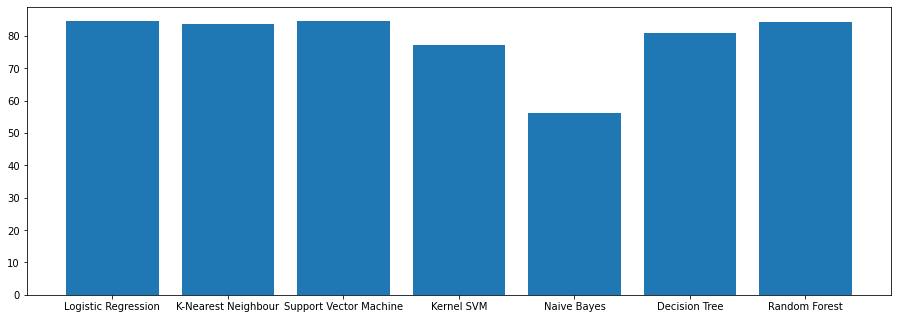

In [60]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(model_accuracy['Model'],model_accuracy['Accuracy'])
plt.show()

## Conclusion

We can finnaly conclude that Logistic Regression would give us the highest accuracy of 84.81%.

- If we are supposed to target adults with income greater than 50K annually we can use Logistic Regression to get the best accuracy.
- We can use Naive Bayes although its accuracy is very low, but it get the most people with the concerned bracket.

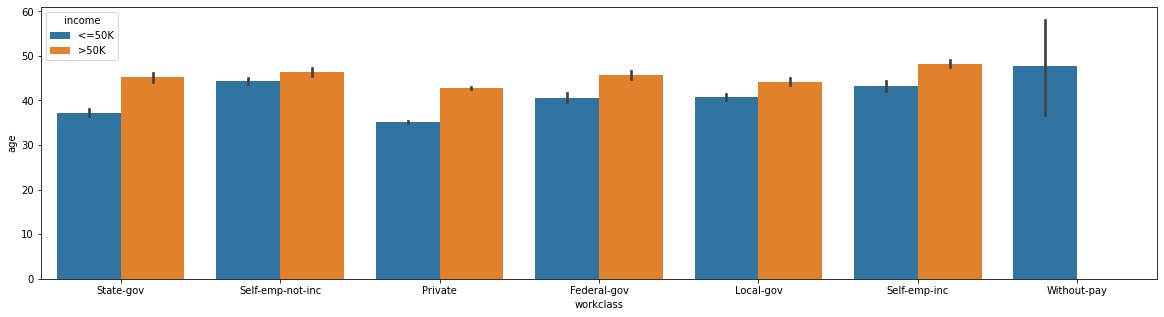

In [61]:
plt.figure(figsize=(20,5))
sb.barplot(x="workclass", y="age", hue="income", data=adult_data_train)
plt.show()

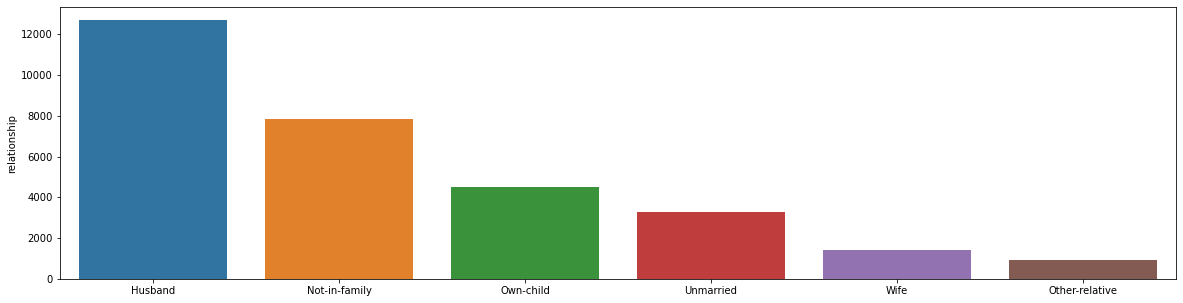

In [62]:
plt.figure(figsize=(20,5))
sb.barplot(adult_data_train['relationship'].value_counts().index.values,adult_data_train['relationship'].value_counts())
plt.show()